In [328]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools

from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D

In [311]:
class IsingModel:
    def __init__(self,grid_size, temperature):
        self.grid_size = grid_size
        self.grid = np.random.choice([-1,1],size=(grid_size,grid_size))
        self.T = temperature
        
        self.states = [self.grid]
        
    def animate(self):
        global fig,frames, ani
        
        fig, grids = plt.subplots(1)
        frames = [[plt.imshow(s, animated=True, cmap='bwr')] for s in self.states]
        ani = anim.ArtistAnimation(fig,frames,interval=1,blit=False,repeat_delay=1)
        
        plt.show()
        
    
    def update(self):
        cell_xy = np.random.randint(self.grid_size,size=2)
        neighbors_xy = np.array([np.array(cell_xy+[i,j])%self.grid_size for i,j in itertools.product(range(-1,2),range(-1,2)) if abs(i+j)==1])
        cell_state = self.grid[tuple(cell_xy)]
        neighbors_states = [self.grid[tuple(xy)] for xy in neighbors_xy]
        E = -cell_state*(np.sum(neighbors_states))
        
        p_flip = min(1, np.exp(2*E/self.T))
        
        if np.random.random() < p_flip:
            self.grid[tuple(cell_xy)] = -cell_state        

        self.states.append(deepcopy(self.grid))
        
    
    def average_magnetization(self):
        for i,j in itertools.product([-1,0,1],[-1,0,1]):                
        
        
    

<IPython.core.display.Javascript object>


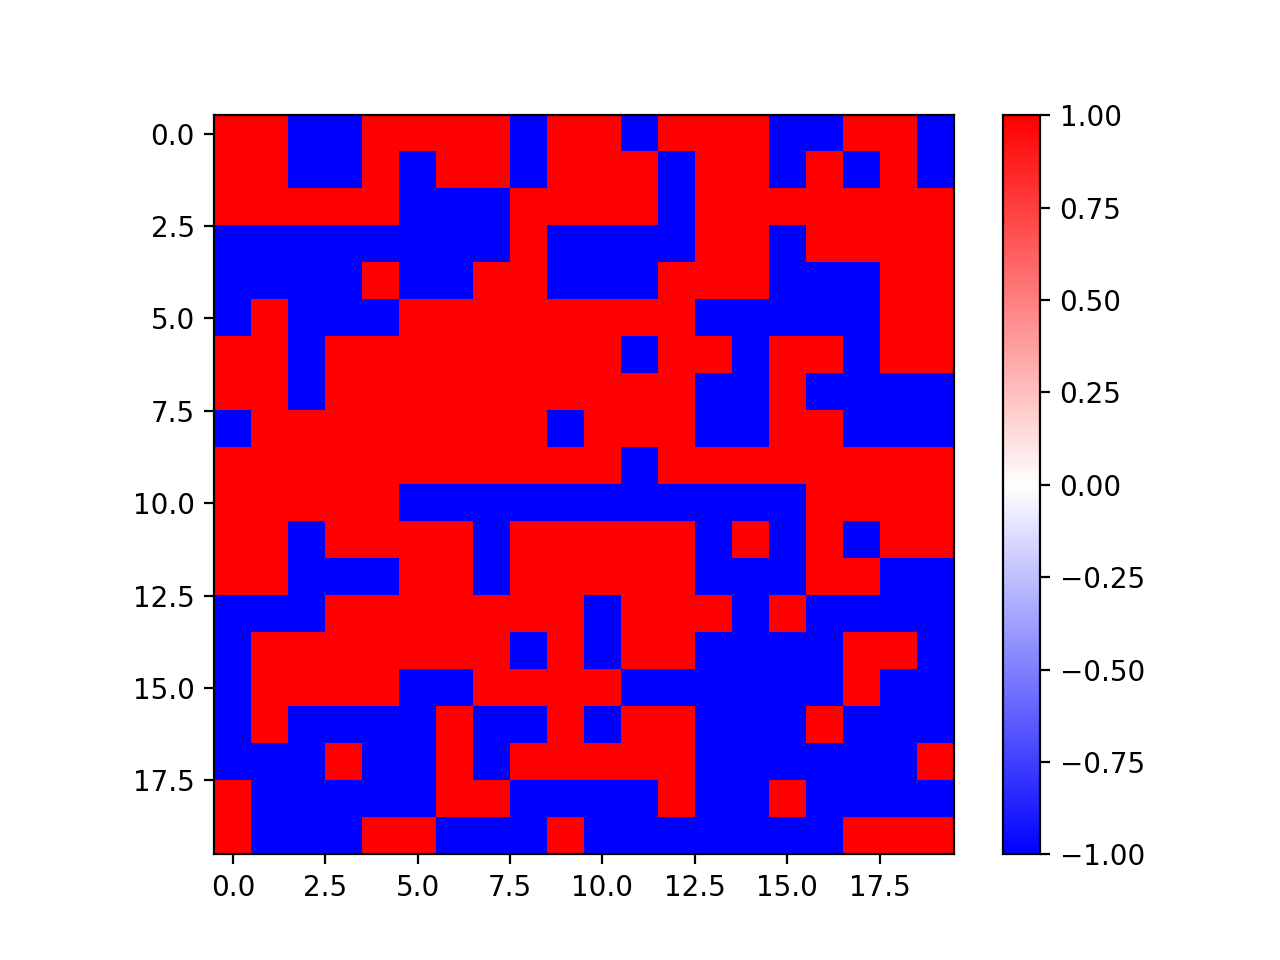

In [317]:
sim = IsingModel(20,2)

for _ in range(1000):
    sim.update()
sim.animate()
plt.colorbar()
plt.show()

#print(sim.states[1]-sim.states[0])

<IPython.core.display.Javascript object>


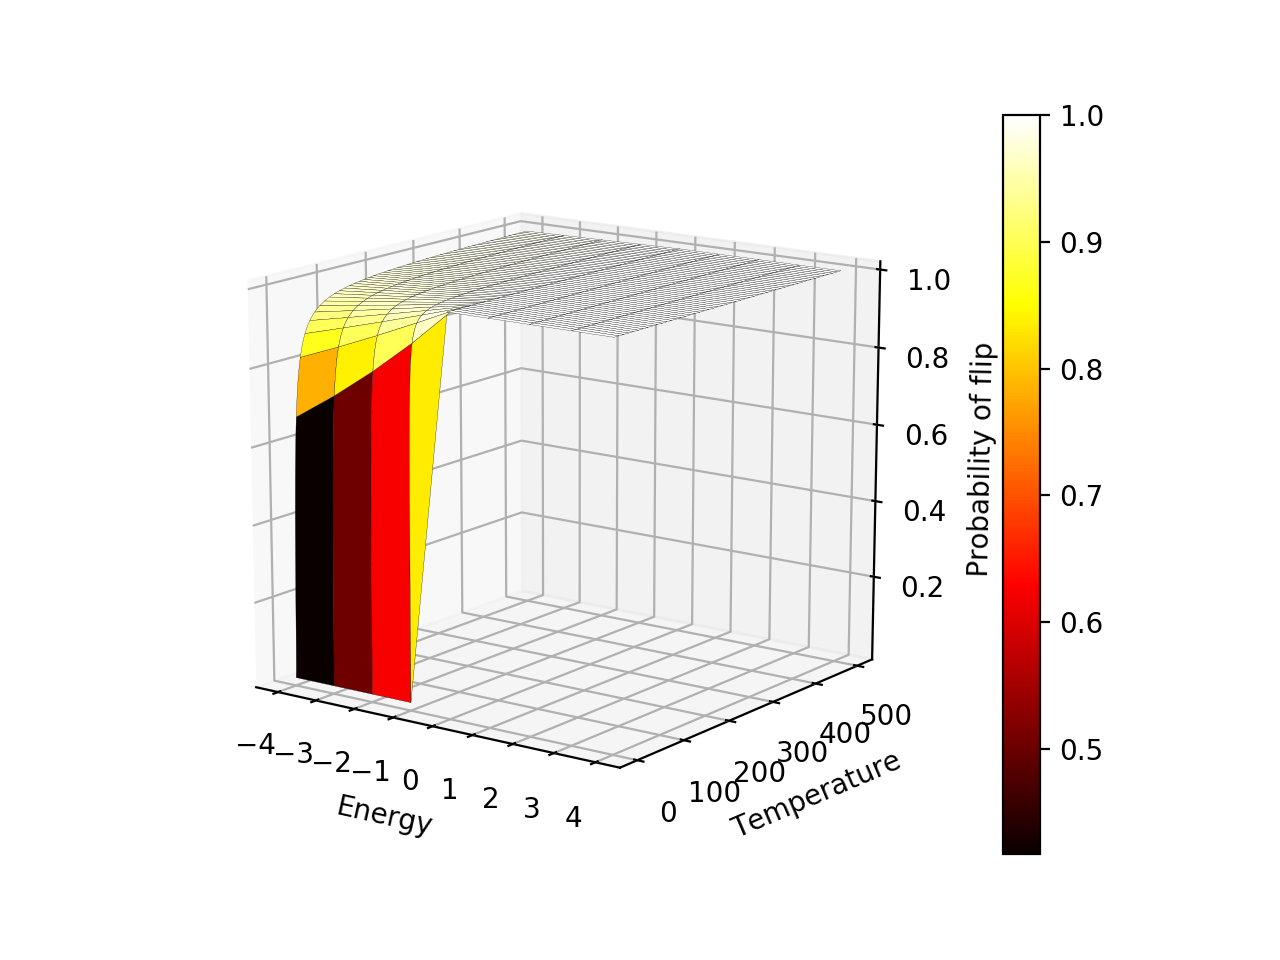

In [349]:
fig = plt.figure()
ax = plt.axes(projection='3d')


x = np.arange(-4,5,1)
y = np.linspace(0.01,500,1000)

x, y = np.meshgrid(x, y)

z = np.exp(-x/y)
z = np.array([[min(z,1) for z in zz] for zz in (np.exp(x/y))])

ax.set_xlabel('Energy')
ax.set_ylabel('Temperature')
ax.set_zlabel('Probability of flip')

q = ax.plot_surface(x,y,z, cmap=plt.cm.hot, edgecolor='k', linewidth=0.1)
ax.view_init(15,-54)
plt.colorbar(mappable=q)
plt.show()



In [325]:
print(10)

10
